<a href="https://colab.research.google.com/github/elenisproject/NewsCleanser/blob/master/notebooks/most_common_per_category.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook we are going to find the most commont words per category
<br>
<font size="3">
First we need to import all the needed libraries for this project
<br>
We our going to use:

- matplotlib
- pandas
- wordcloud
    </font>

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import collections
from collections import Counter,defaultdict,OrderedDict,namedtuple 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

<br>
<font size="3">After installing and importing everything we are going to need we will read our data from the output.csv file</font>
<br>

In [ ]:
df = pd.read_csv('output.csv')

<font size="3">We will group our data by category and will find the most popular words for each category<br>
First we will create the needed functions:
- **common_category(x):** gets as ipnut a category from our data and calculates the 100 most popular words for the given category.
- **plot_cloud(x,y):** gets as iput a list of 100 words and a string, and plots a worldcloud from the given list.
- **plot_barchart(x,y,z):** gets as input a list of 10 words, and two strings the fisrt is the category from where the lists of words came from and the second is the color to set the barchart.
</font>

In [ ]:
def common_category(category):
    #group all articles by their topic
    culture_articles = df.groupby(['topic']).get_group(category)['article_body']

    #set an empty variable to save all the words 
    all_words_compined = []

    #combine all words from each article
    for words in culture_articles:
        if type(words) != float:
            word_list = words.split()
            all_words_compined.extend(word_list)

    # use counter to count each word and return the 100 most common ones
    top = Counter(all_words_compined).most_common(100)
    return top


#this function gets as input the top words for each topic, and the topics name and 
#plots the cloud of words 
def plot_cloud(top,topic):
    wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(top))
    fig = plt.figure(figsize=(30,10), facecolor='white')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(topic + ': 100 Most Common Words', fontsize=100)
    plt.tight_layout(pad=0)
    plt.show()

#this function gets as input the top words for each topic, and the topics name and 
#plots the bar chart of the top 10 most common words  
def plot_barchart(top,topic,my_color):
    top = top[0:10]
    words = []
    count = []
    for values in top:
        words.append(values[0])
        count.append(values[1])

    plt.figure(figsize=(15, 5))
    plt.bar(words, count, color = my_color)
    plt.title('Bar chart for 10 most common words in '+topic)
    plt.show()
    

<font size="3">Here is the main code that is used to plot our output:
</font>

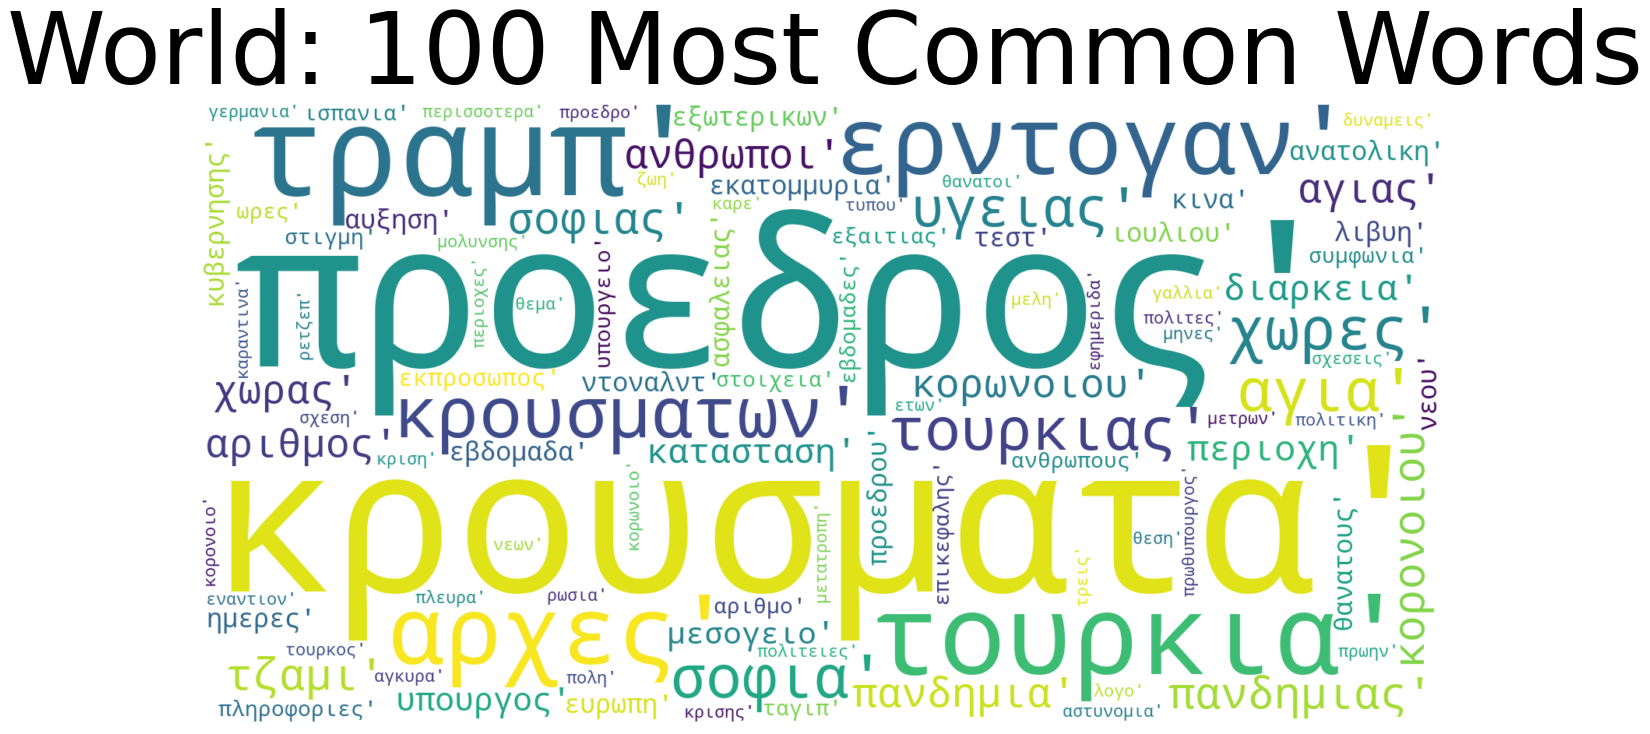

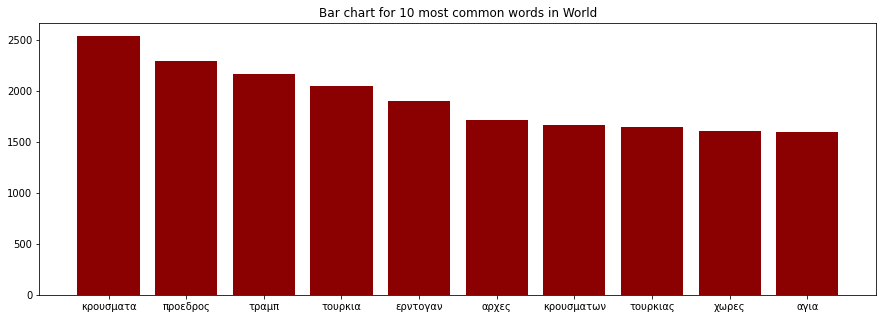

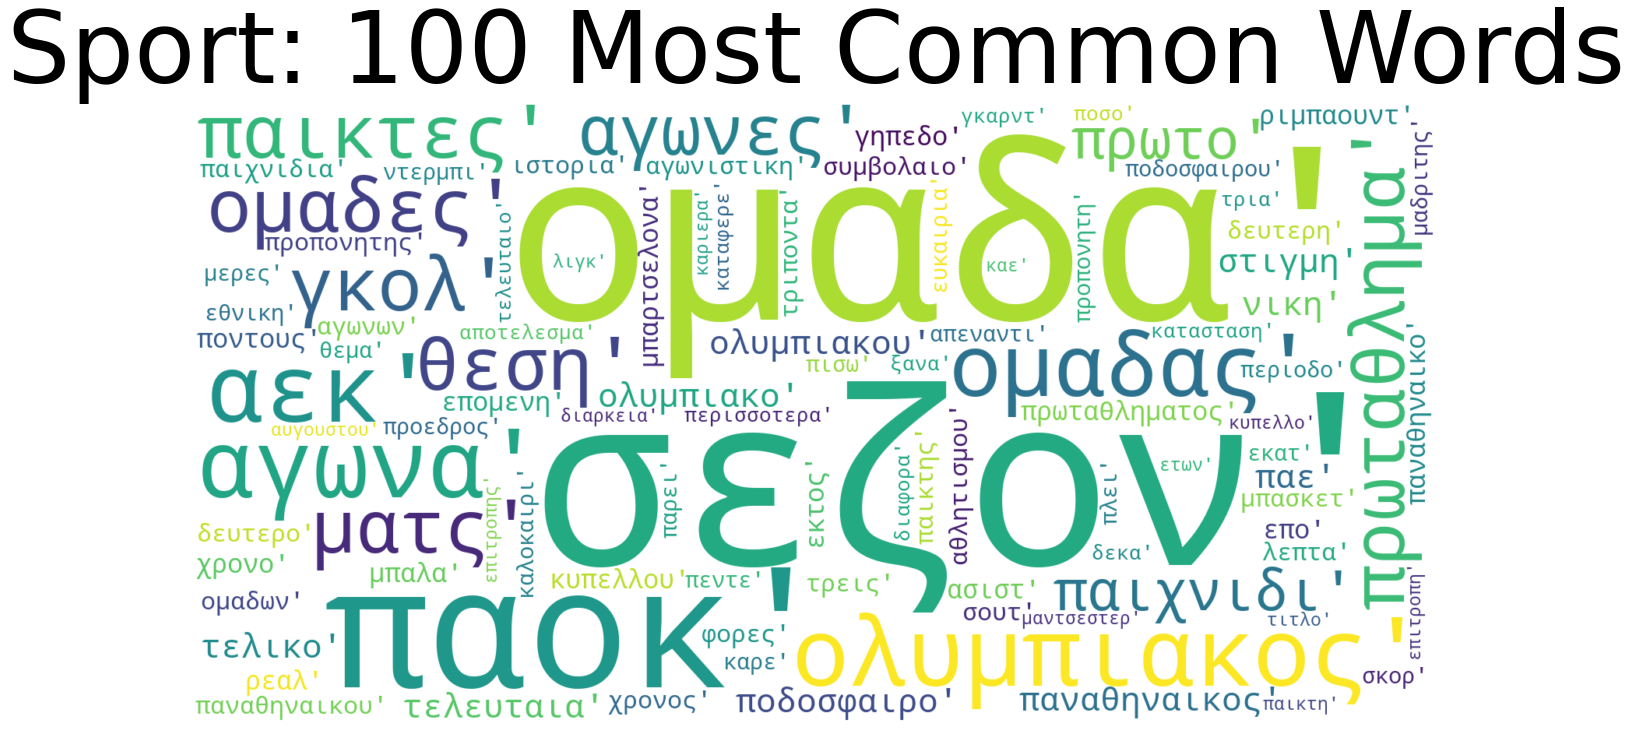

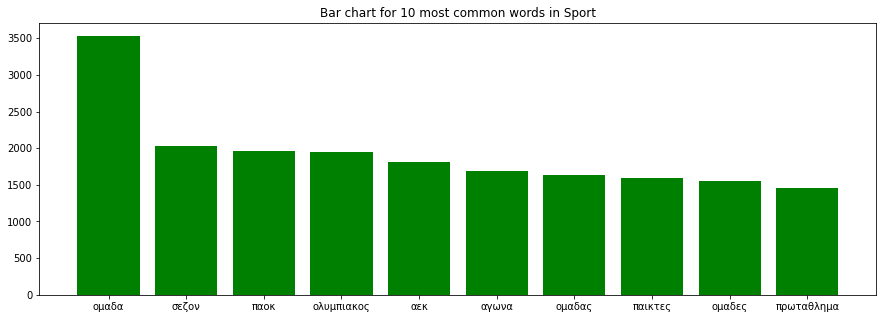

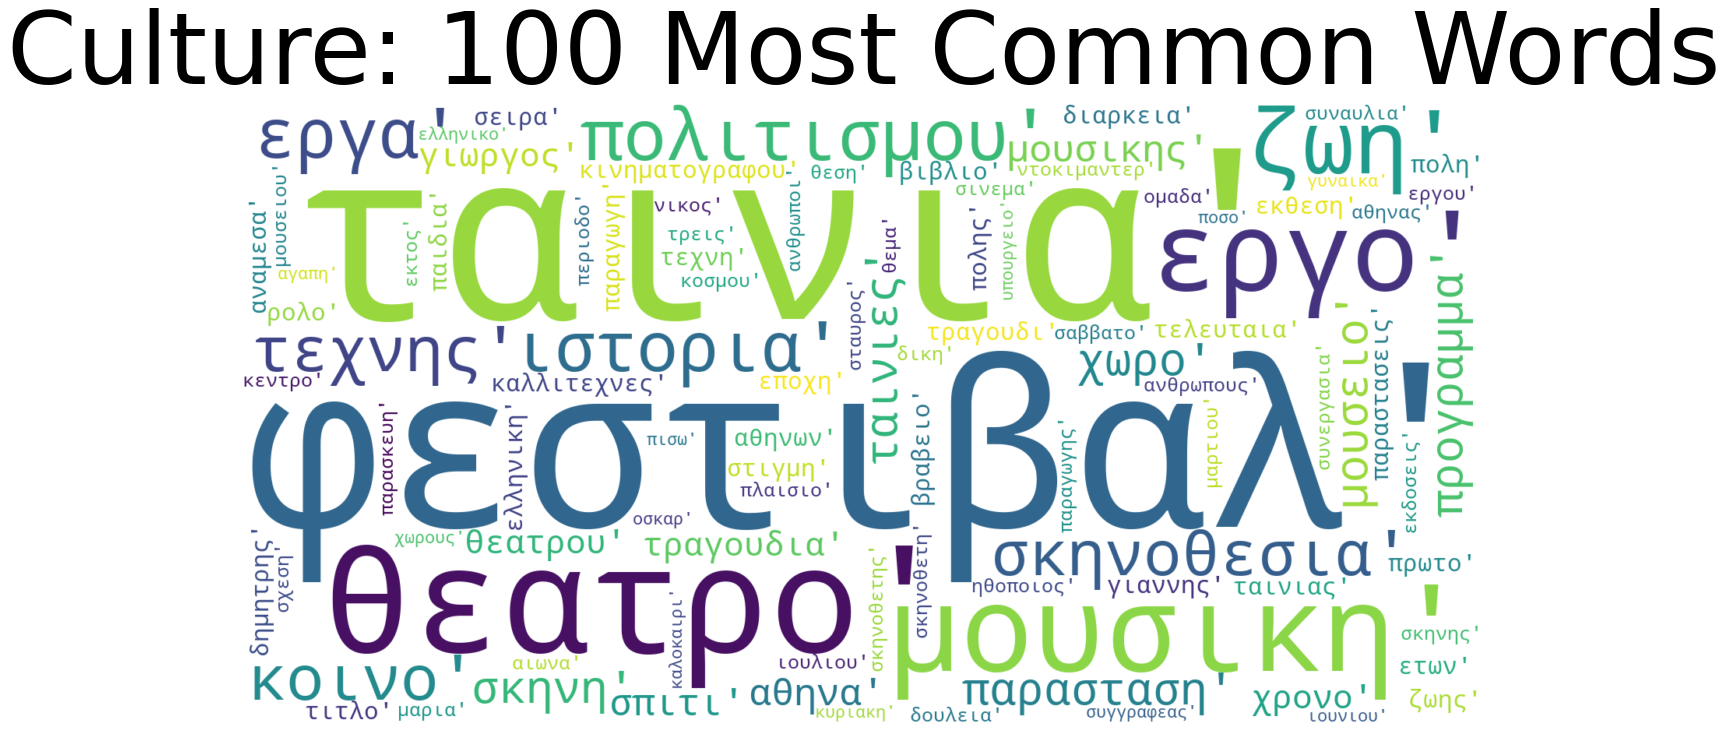

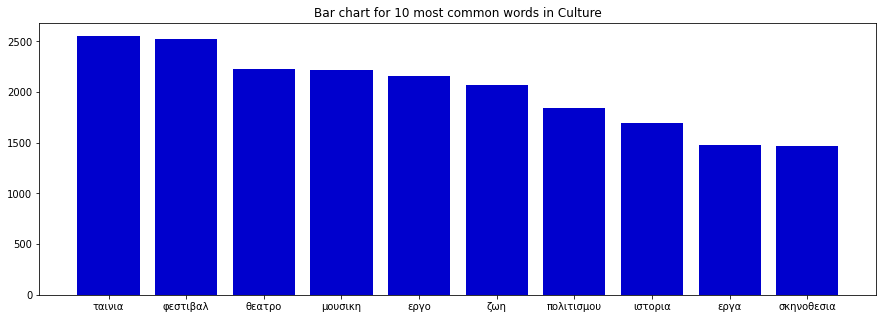

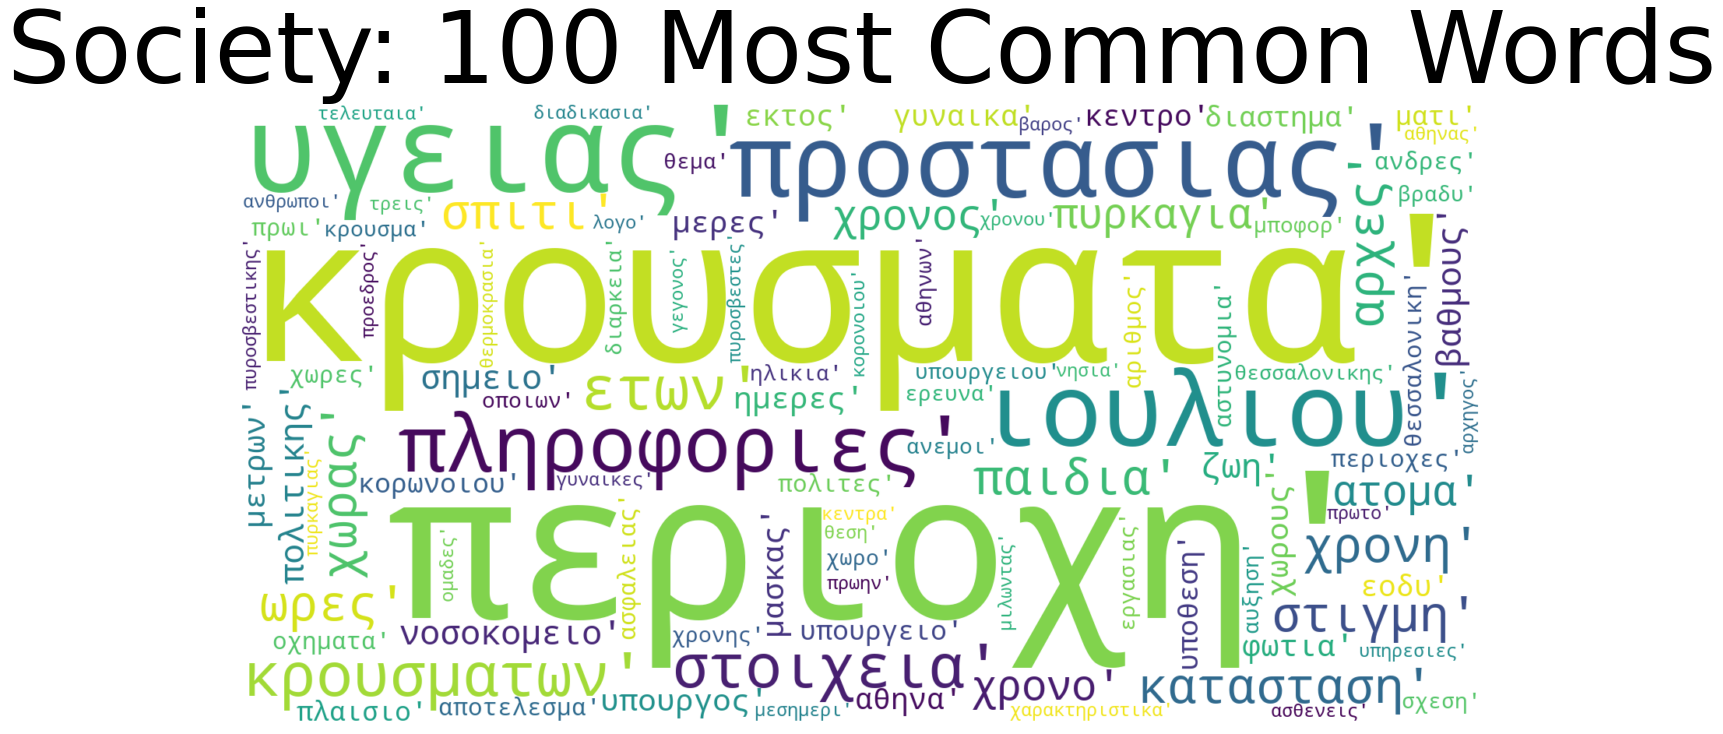

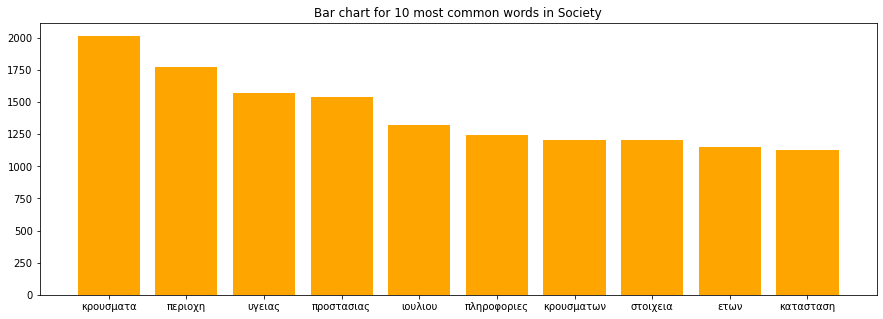

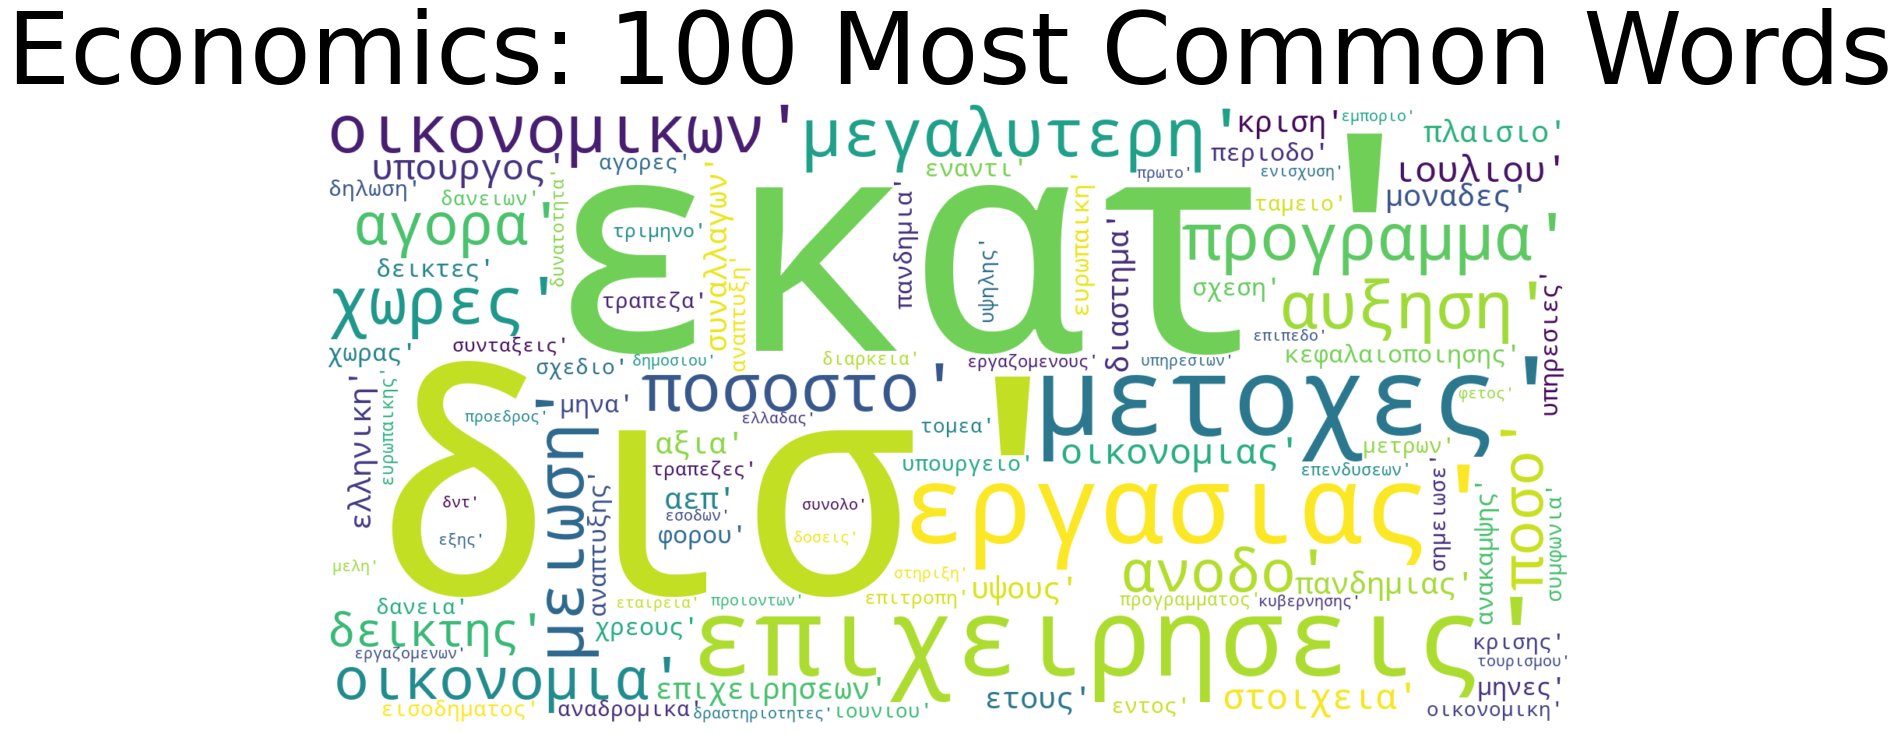

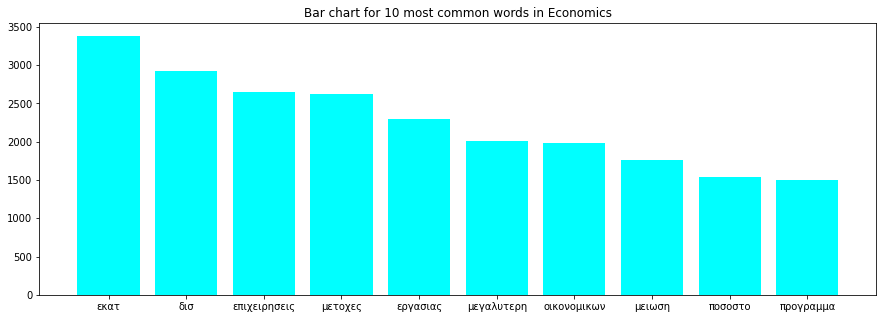

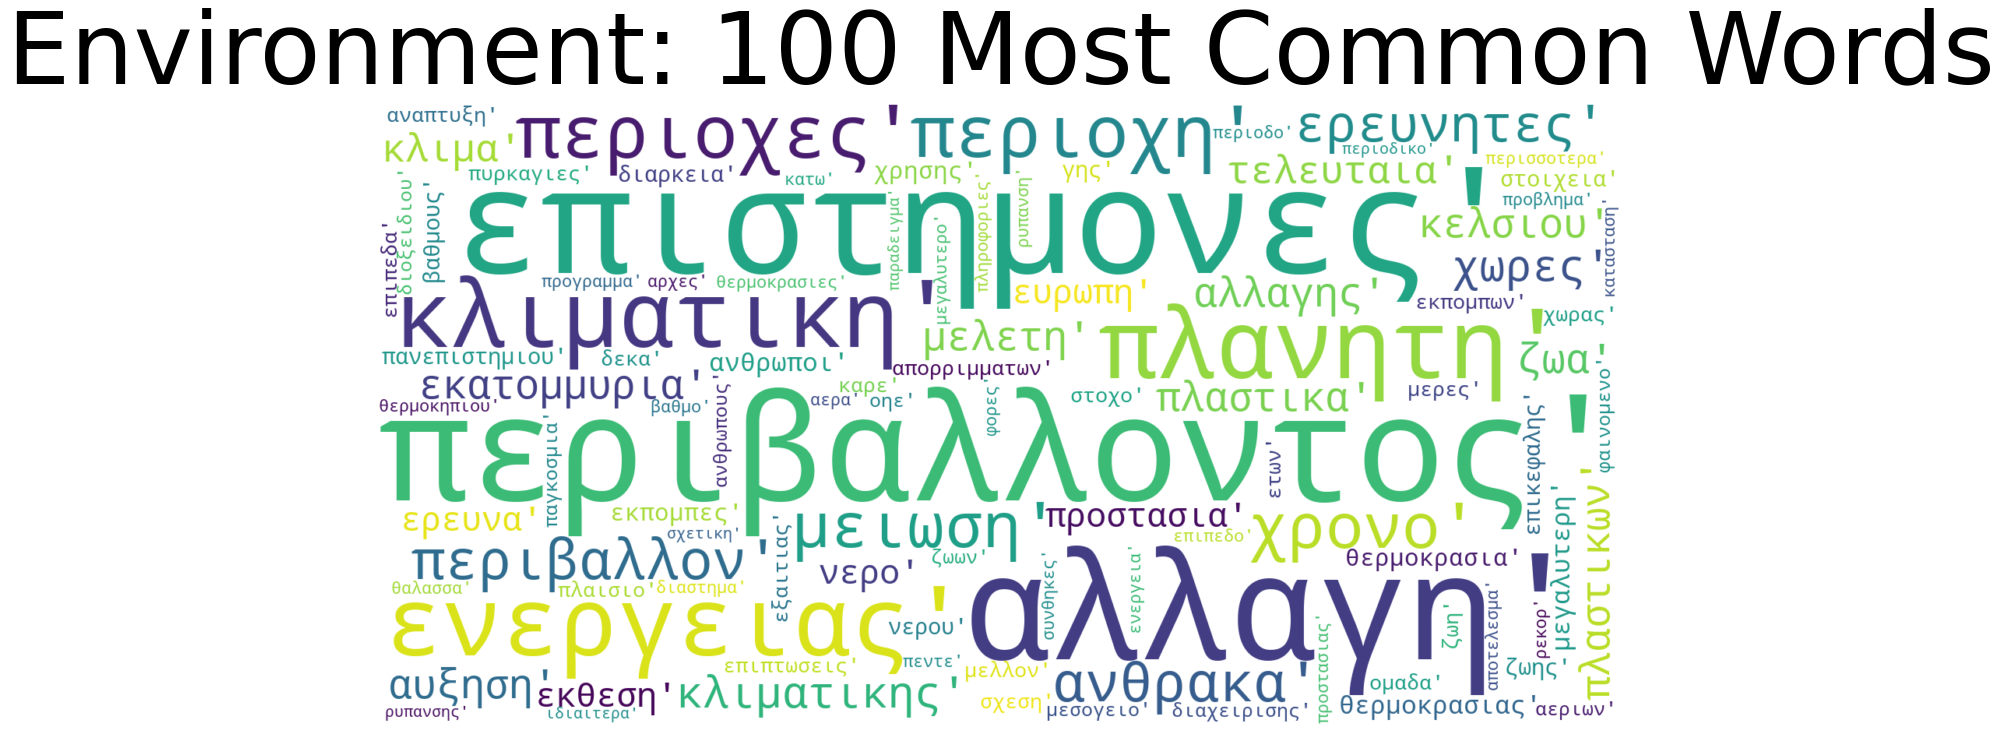

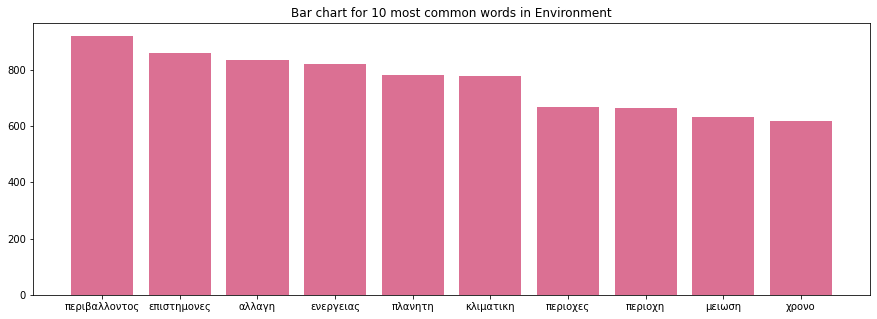

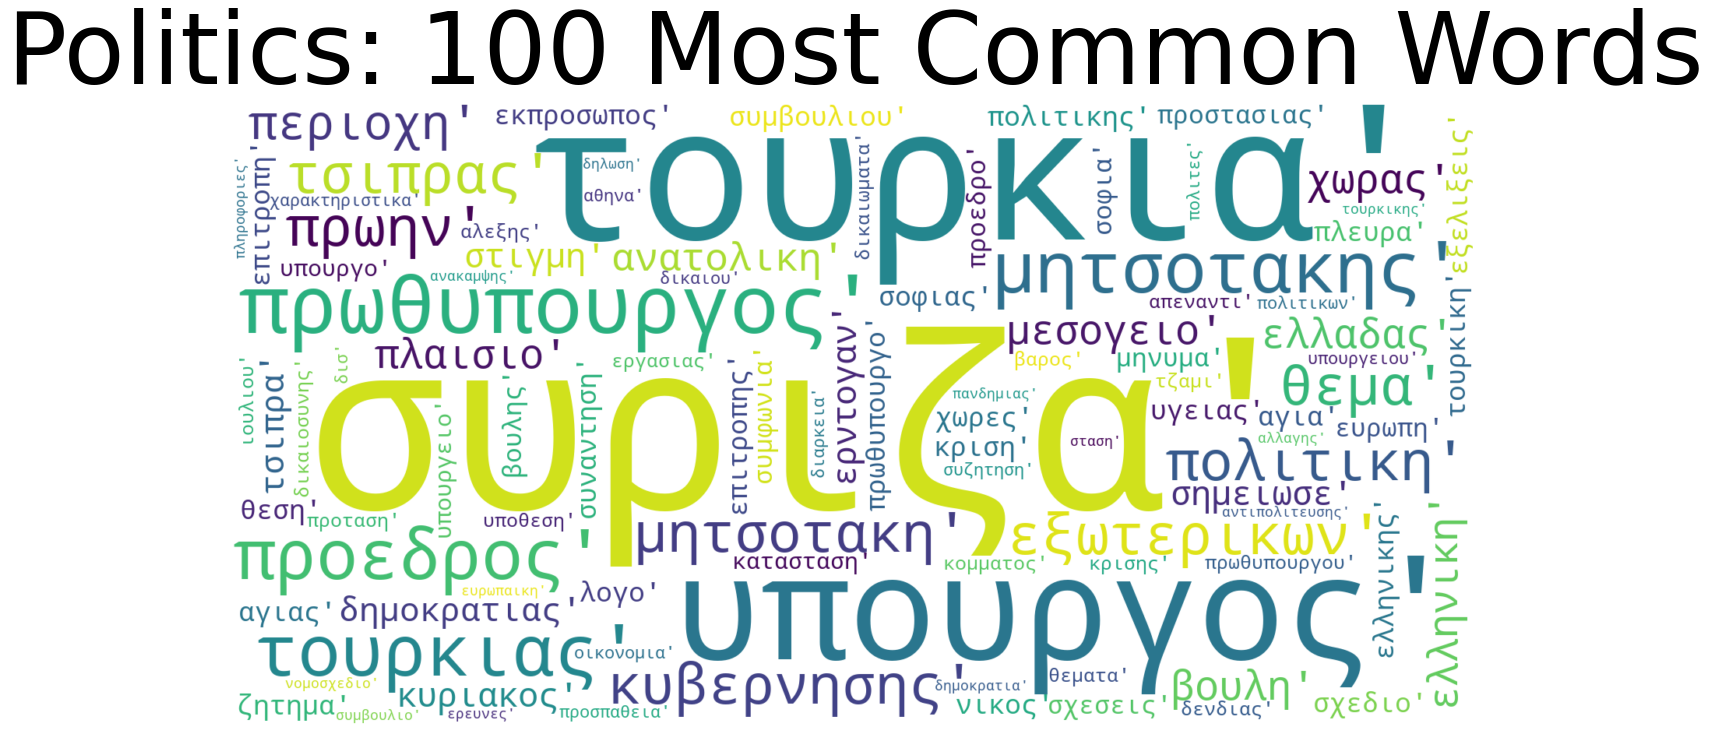

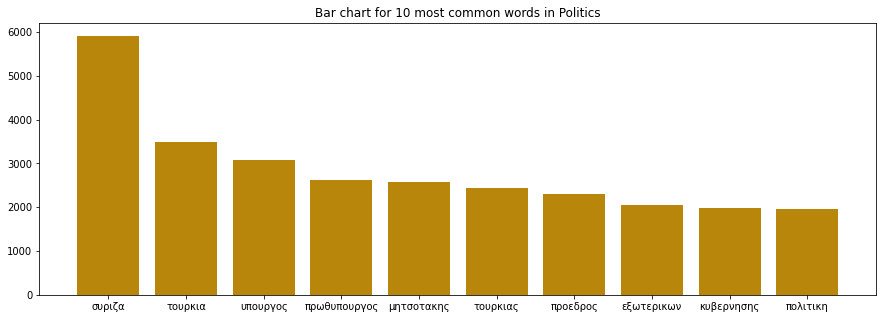

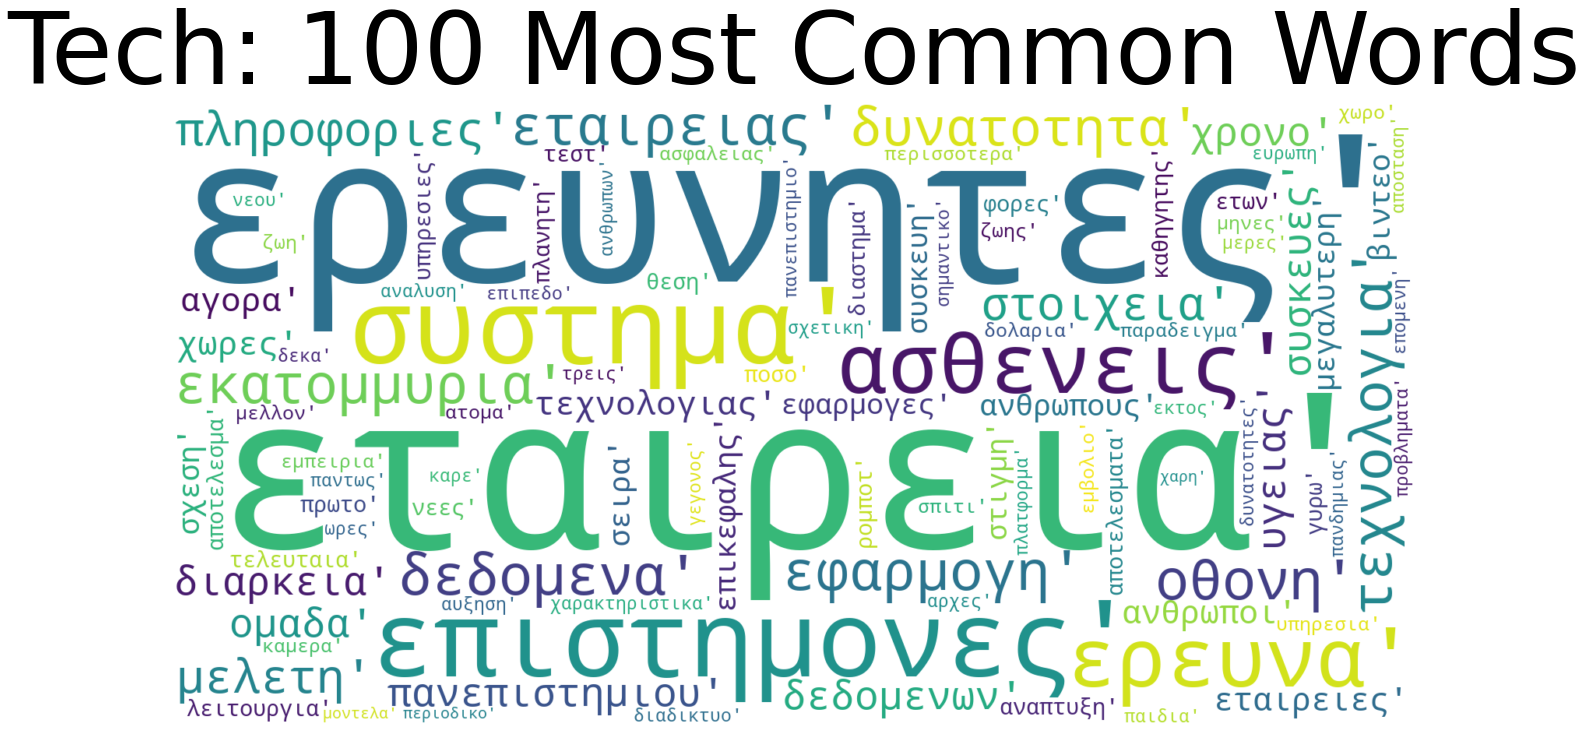

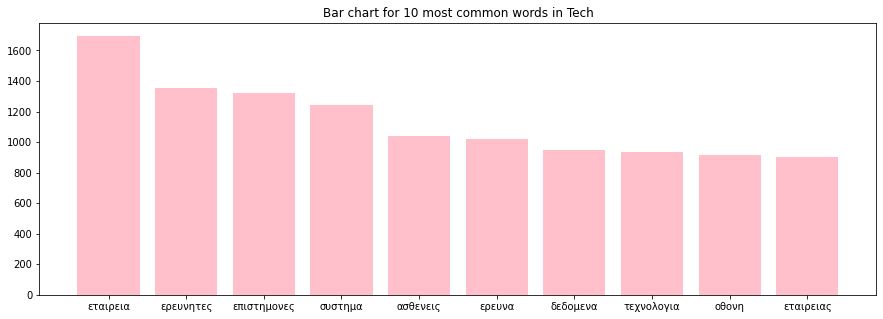

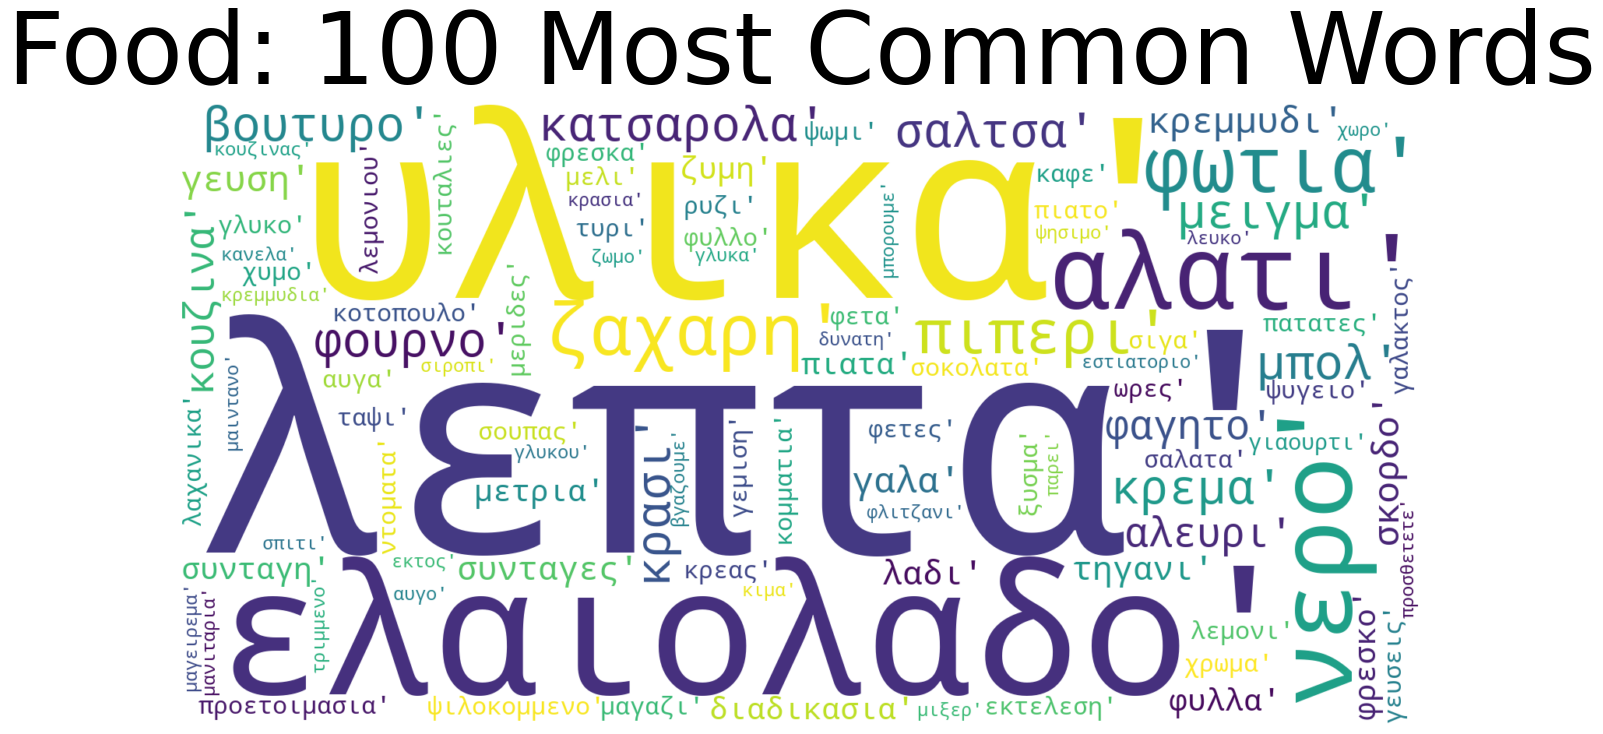

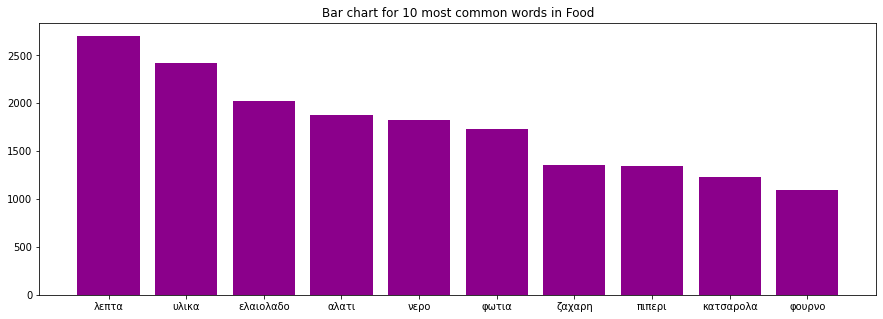

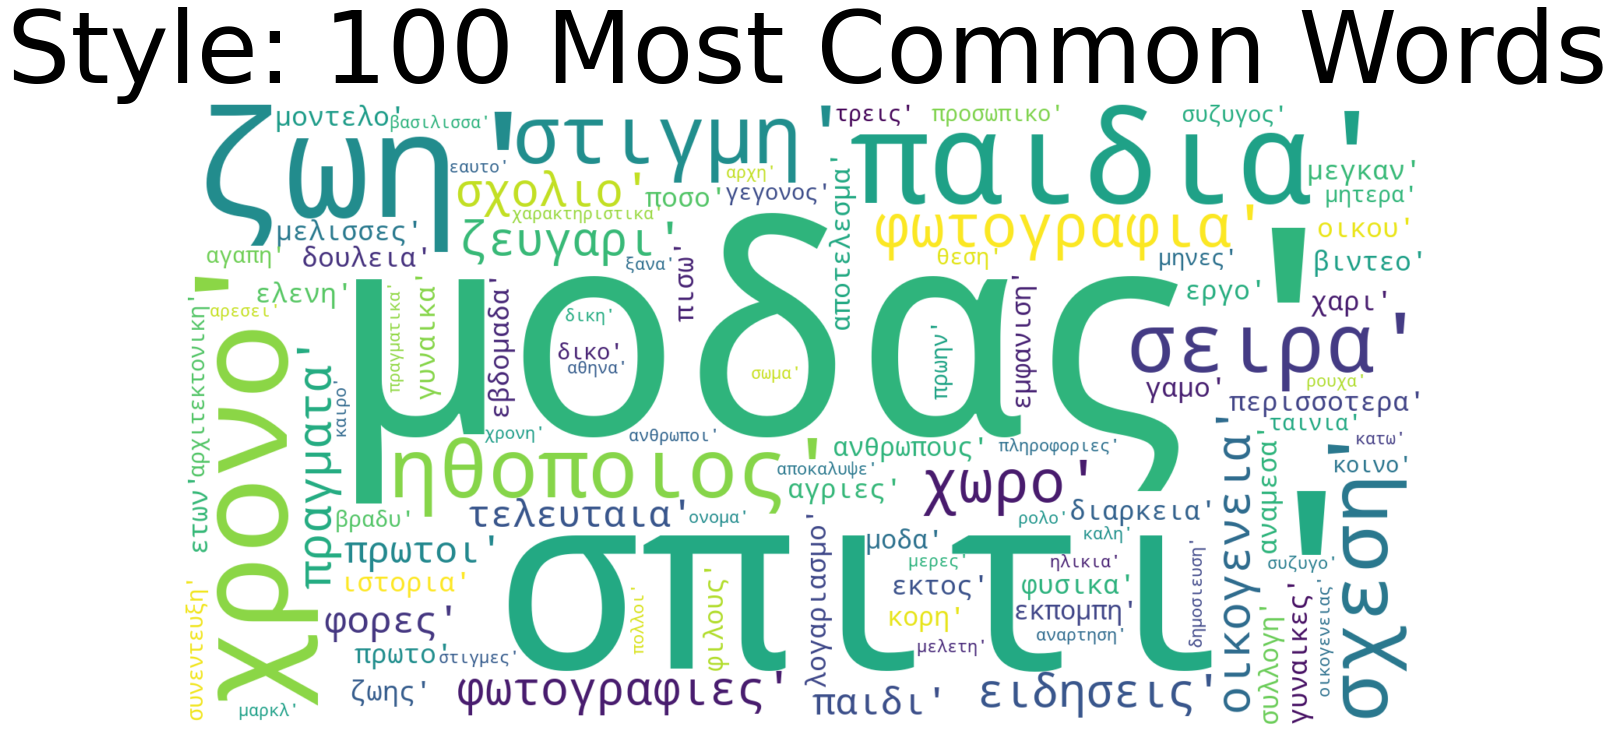

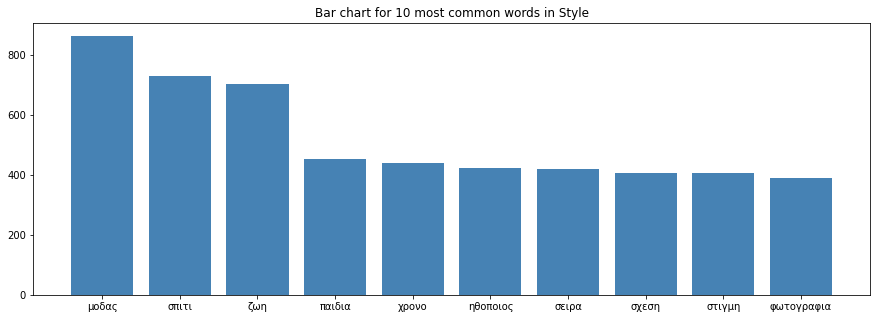

In [ ]:
#List unique values in the df['topic'] column
categories = df.topic.unique()

#list of colors to use
my_list = ['darkred','green','mediumblue', 'orange','cyan','palevioletred','darkgoldenrod','pink', 'darkmagenta','steelblue']

#print the charts
for category in categories:
    #set a color
    my_color = my_list.pop(0)
    #find the top words
    top = common_category(category)
    print('')
    #plot the cloud
    plot_cloud(top,category)
    #plot the bar chart
    print('')
    plot_barchart(top,category,my_color)
